# Insurance Premium Price Prediction Using Machine Learning

The goal of this project is to create a model using machine learning with the aim of accurately predicting the insurance cost for a client based on data regarding their health and history

Additionally, an exploratory data analysis (EDA) will be conducted to uncover key insights into the clients' data to identify trends in the insurance agency's client base

## Importing Libraries

In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score as r2 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

## Creating Function For Future Use

In [58]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print('Train R2:\t' + str(round(r2(train_true_values, train_pred_values), 3)))
    print('Test R2:\t' + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    plt.show()

## Importing the Dataset

In [2]:
df = pd.read_csv('/Users/admin/Downloads/Medicalpremium.csv')

## Column description:

**Age** - The client's age

**Diabetes** - Whether the client has abnormal blood sugar levels

**BloodPressureProblems** - Whether the client has abnormal blood pressure levels

**AnyTransplants** - Whether the client has had any major organ transplants 

**AnyChronicDiseases** - Whether the client suffers from chronic ailments such as asthma, etc.

**Height** - The client's height in centimeters (cm)

**Weight** - The client's weight in kilogrammes (kg)

**KnownAllergies** - Whether the client has any known allergies 

**HistoryOfCancerInFamily** - Whether any blood relative of the client has had any form of cancer

**NumberOfMajorSurgeries** - The number of major surgeries *(not including major organ transplants)* the client has had in the past

**PremiumPrice** - Yearly premium price in USD ($)

## Initial Overview of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


From the initial overview, nothing stands out in terms of anomalies and there aren't any null values

**All numeric features seem to be within the norm for their respecitve ranges** (such as the age range being 18 to 66, and the heights being 146cm to 188cm). Additionally, all **boolean features also don't have any abnormal values**.

All in all, the dataset seems to be very clean and no data cleaning is necessary, at least based on what can currently be seen, perhaps something will become apparent during the EDA

## Exploratory Data Analysis

The goal of this EDA will be to, first of all, see the distribution of clients by age groups to determine the overall picture of the clientbase, additionally, the premium price distribution will also be checked

Afterwards check the distribution of major risk factors (such as diabetes, number of major surgeries, etc.) by age groups 

My initial assumption is that **Age is one of if not the highest determiner of the premium price**, though, of course, the hypothesis will need to be tested, which is why the plan is to check everything mentioned previously to confirm or deny said hypothesis

### Creating "BMI" Feature

In [5]:
bmi = (df['Weight'] / (df['Height']/100)**2).round(1)

df.insert(7, 'BMI', bmi)

df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,27.460041,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,5.879494,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,15.200000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,23.400000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,27.200000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,30.800000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,50.000000,1.000000,1.000000,3.000000,40000.000000


Since height and weight don't carry any significant information by themselves, I decided to create the **BMI** feature to better reflect the overall picture regarding the client's health

To create the feature, I used the following formula: **BMI = kg/m^2**

### Checking Feature Correlation

<AxesSubplot:title={'center':'Heatmap for correlation'}>

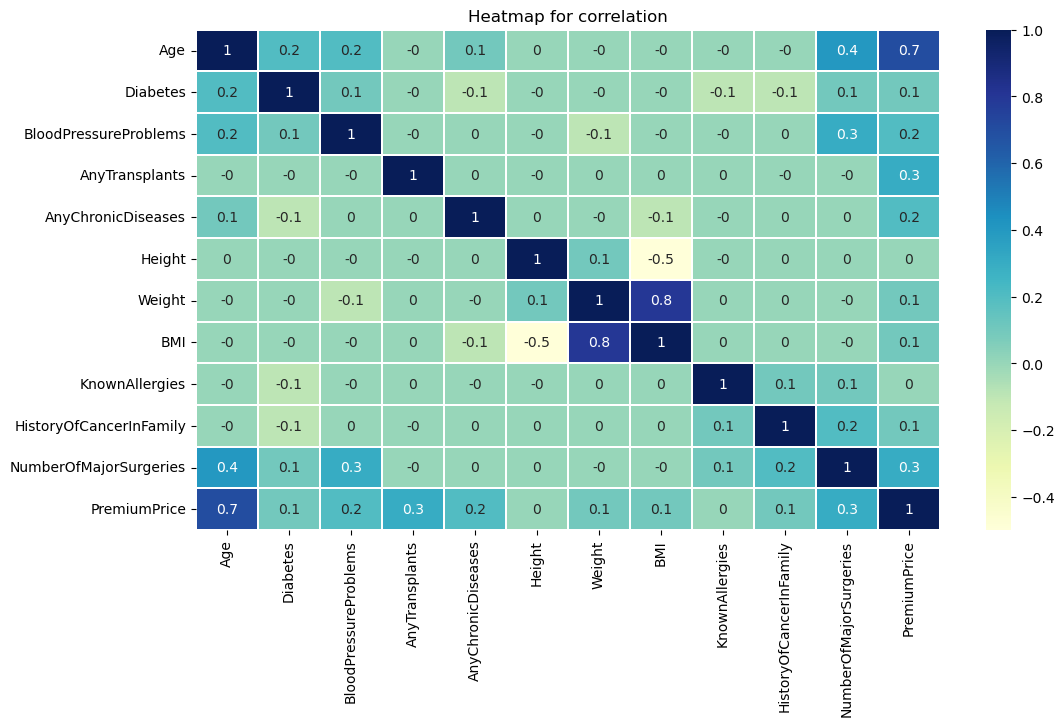

In [6]:
correlation = df.corr()

fig,ax = plt.subplots(figsize=(12,6.5))
plt.title("Heatmap for correlation")
sns.heatmap(correlation.round(1),cmap='YlGnBu',annot=True,linewidth=0.30,ax=ax)

The feature correlation map supports the hypothesis so far, showing an impressive 0.7 correlation between age and premium price

This, however, may be a result of a combination of factors, such as older people being more prone to health problems among others, as such, each individual risk factor that may have any potential realtionship with the clients' age ought to be analysed to determine the actual reason as to why age has such a high correlation with premium price

### Analysing the Overall Distribution in Client Age and Premium Price

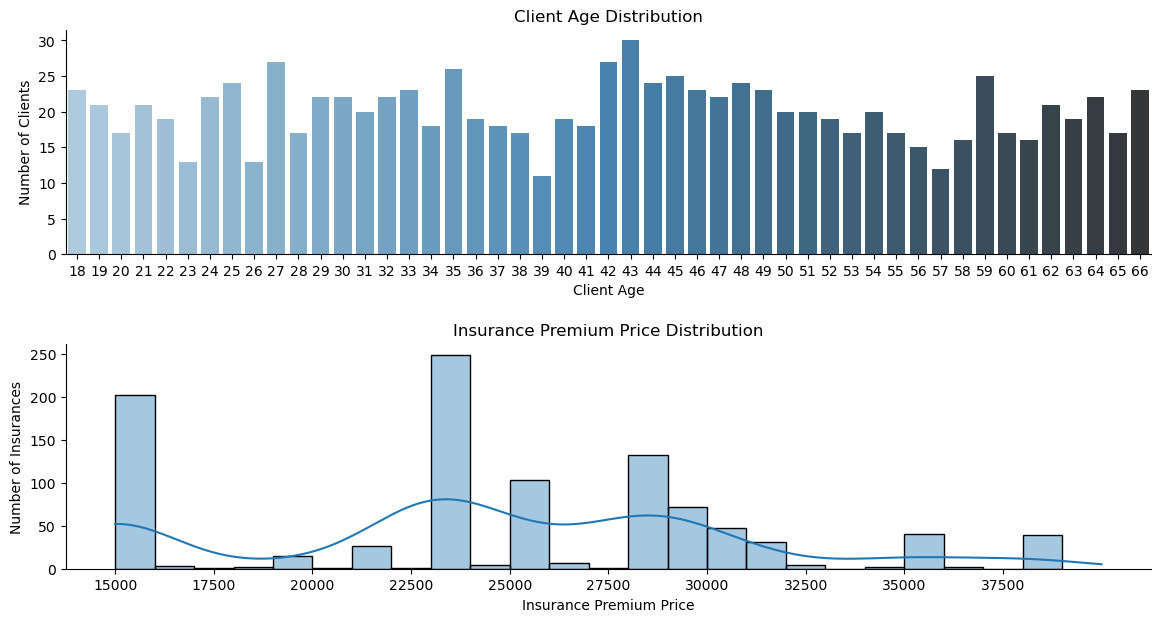

In [7]:
plt.figure(figsize=(14, 7))

plt.subplot(2,1,1)

sns.countplot(data = df, x='Age', palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Client Age Distribution')

plt.subplot(2,1,2)

sns.histplot(data = df['PremiumPrice'], bins=np.arange(15_000,40_000,1000), palette="Blues_d", alpha=0.4, kde=True)

sns.despine(right = True, top = True)
plt.ylabel('Number of Insurances')
plt.xlabel('Insurance Premium Price')
plt.xticks(np.arange(15_000,40_000,2500))
plt.title('Insurance Premium Price Distribution')

plt.subplots_adjust(hspace=0.4)

plt.show()

As we can see, we have an **essentially equal distribution of clients by age**, with an ever so slightly higher amount of clients aged less than 42, though the difference can be considered insignificant 

As for the distribution of prices for insurance premiums, we can divide them into 2 categories: above and below 28K

When it comes to prices below 28K, **the bulk seem to be between either 15-16K or 23-24K**, with every price range lagging behind severely in terms of the number of clients. However, when it comes to premiums over 28K, the distribution shows a much more varied price range, albeit in lower numbers 

### Analysing Potentially Age-Related Risk Factors

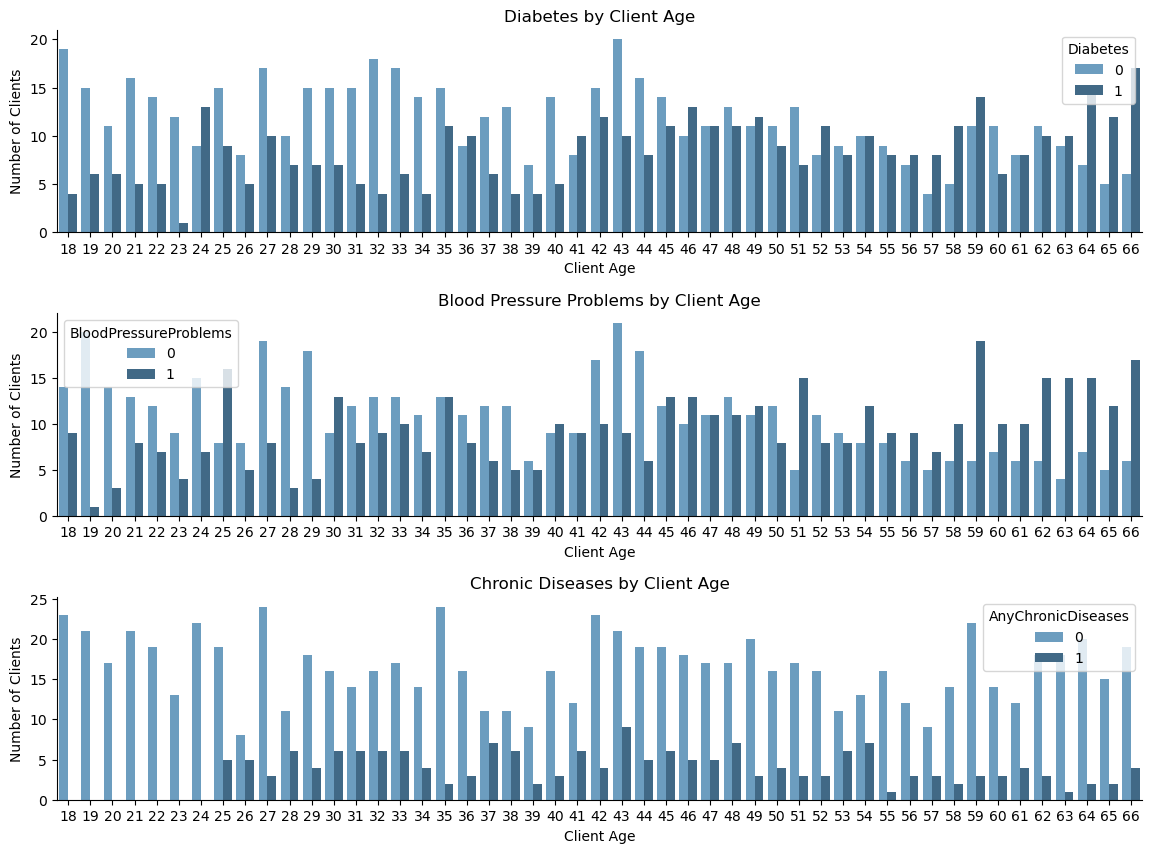

In [8]:
plt.figure(figsize=(14, 10))

plt.subplot(3,1,1)

sns.countplot(data = df, x='Age', hue='Diabetes',palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Diabetes by Client Age')

plt.subplot(3,1,2)

sns.countplot(data = df, x='Age', hue='BloodPressureProblems',palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Blood Pressure Problems by Client Age')

plt.subplot(3,1,3)

sns.countplot(data = df, x='Age', hue='AnyChronicDiseases',palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Chronic Diseases by Client Age')

plt.subplots_adjust(hspace=0.4)

plt.show()

Thus far, the hypothesis is holding true, as there is a **much higher ratio of healthy clients to clients with health issues in the younger age groups** when it comes to diabetes and blood pressure problems

More specifically, **the turning point seems to be around 45 years old**, where the amount of clients with health issues starts to match and later overtake the healthy clients, this applies to the cases of both diabetes and blood pressure problems

Interestingly, however, the inverse is true in regards to chronic diseases, wherein **clients in their early 30s show the most cases of chronic diseases** while **the oldest clients have the least cases**, aside from those aged 18-24 (who have no cases of chronis diseases whatsoever)

This, of course, is not the end-all be-all determiner that age is the highest determiner of premium price, but it at least gives support the the hypothesis

### Analysing BMI by Age Groups

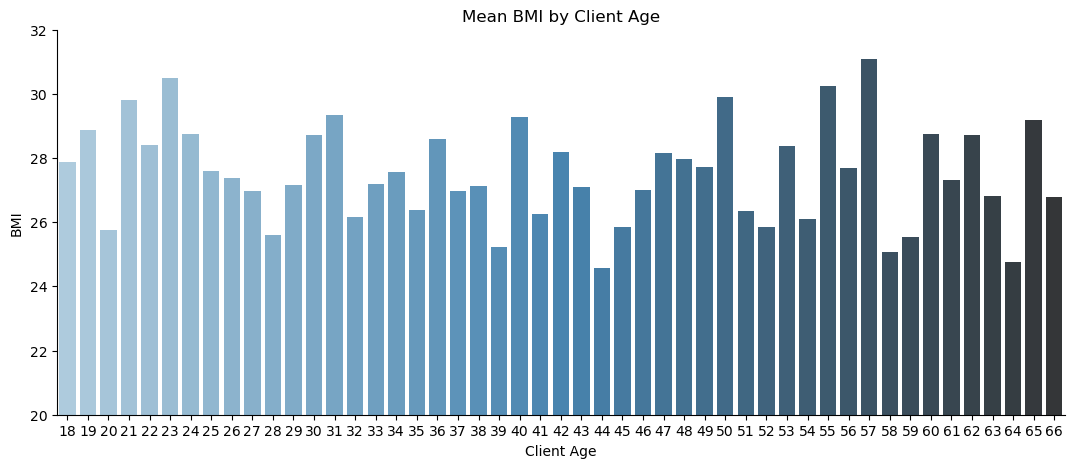

In [22]:
bmi_by_age = df.groupby(by='Age')['BMI'].agg('mean').reset_index()

plt.figure(figsize=(13,5))

sns.barplot(data=bmi_by_age, x="Age", y="BMI", palette="Blues_d")

plt.ylim(20, 32)
sns.despine(right = True, top = True)
plt.ylabel('BMI')
plt.xlabel('Client Age')
plt.title('Mean BMI by Client Age')

plt.show()

In [10]:
print(f"Mean BMI of clients younger than 45: {df.loc[df.Age < 45, 'BMI'].mean()}")

print(f"Mean BMI of clients aged 45 and older: {df.loc[df.Age >= 45, 'BMI'].mean()}")

Mean BMI of clients younger than 45: 27.52622061482824
Mean BMI of clients aged 45 and older: 27.375519630484984


**In terms of the clients' BMI, age doesn't seem to have any significant relationship with it**, seeing as the values fluctuate across all age groups with **no concrete upwards or downwards trend**

Additionally, by checking the mean BMIs of clients above and below the previously established cut-off point (45 years of age), we only see a **difference of less than 0.2** between the two groups' BMIs, meaning **they are essentially the same**

### Analysing Surgery-Related Risk Factors by Age Groups

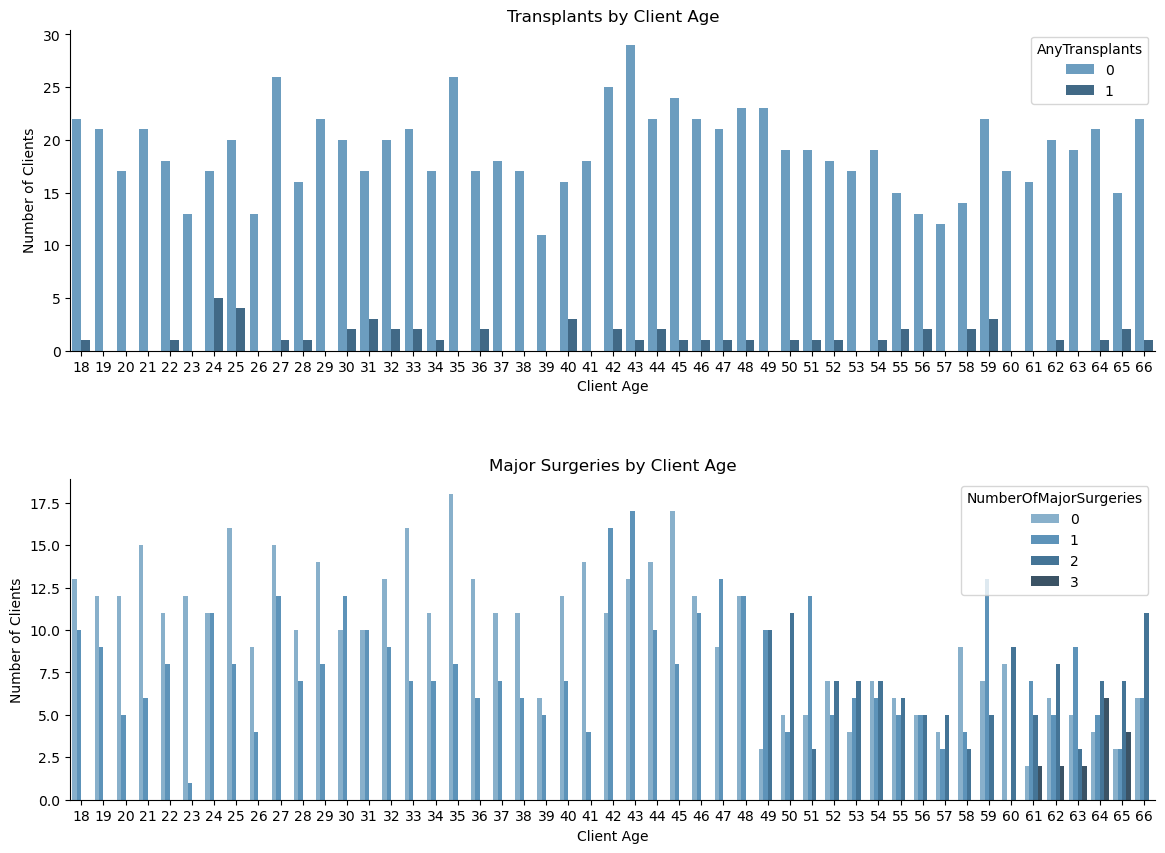

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(2,1,1)

sns.countplot(data = df, x='Age', hue='AnyTransplants',palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Transplants by Client Age')

plt.subplot(2,1,2)

sns.countplot(data = df, x='Age', hue='NumberOfMajorSurgeries',palette="Blues_d")

sns.despine(right = True, top = True)
plt.ylabel('Number of Clients')
plt.xlabel('Client Age')
plt.title('Major Surgeries by Client Age')

plt.subplots_adjust(hspace=0.4)

plt.show()

In [33]:
print(f"Mean number of transplants of clients younger than 45: {df.loc[df.Age < 45, 'AnyTransplants'].mean()}")
print(f"Mean number of transplants of clients aged 45 and older: {df.loc[df.Age >= 45, 'AnyTransplants'].mean()}\n")
print(f"Mean number of surgeries of clients younger than 45: {df.loc[df.Age < 45, 'NumberOfMajorSurgeries'].mean()}")
print(f"Mean number of surgeries of clients aged 45 and older: {df.loc[df.Age >= 45, 'NumberOfMajorSurgeries'].mean()}")


Mean number of transplants of clients younger than 45: 0.059674502712477394
Mean number of transplants of clients aged 45 and older: 0.050808314087759814

Mean number of surgeries of clients younger than 45: 0.39783001808318263
Mean number of surgeries of clients aged 45 and older: 1.0115473441108545


When it comes to the number of transplants, clients younger than 45 actually have a higher mean number of transplants in comparison to the older group. The difference may not seem significant at first glance, but **the younger group, on average, has 20% more transplants than their older counterparts**. 

In regards to the number of major surgeries, the trend continues with older clients exhibiting more risk factors. We can see this very clearly in the graph above as well as through the mean surgery counts, wherein **clients aged 45 and older have an average of 1 surgery per client** as opposed to the **0.4 seen in clients younger than 45**

### Summary

Overall, the 'Age' feature has by far the highest correlation with the insurance premium price due to several factors

Aside from 'Age' itself influencing the price, older clients also have a higher tendency of suffering from diabetes and blood pressure problems. Additionally, older clients have had, on average, 1 surgery as opposed to 0.4 surgeries seen in younger clients

Chronic diseases, BMI, and previous transplants turned out not to have any significant relationship with age, however, everything mentioned previously is already very strong proof of 'Age' being the highest determiner of the insurance premium price

## Predicting Insurance Premium Price Using Machine Learning

### Splitting the data into train and test sets

In [112]:
X = df.loc[:, df.columns != 'PremiumPrice']
y = df['PremiumPrice']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

### Linear Regression Model

In [135]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Train R2:	0.622
Test R2:	0.714


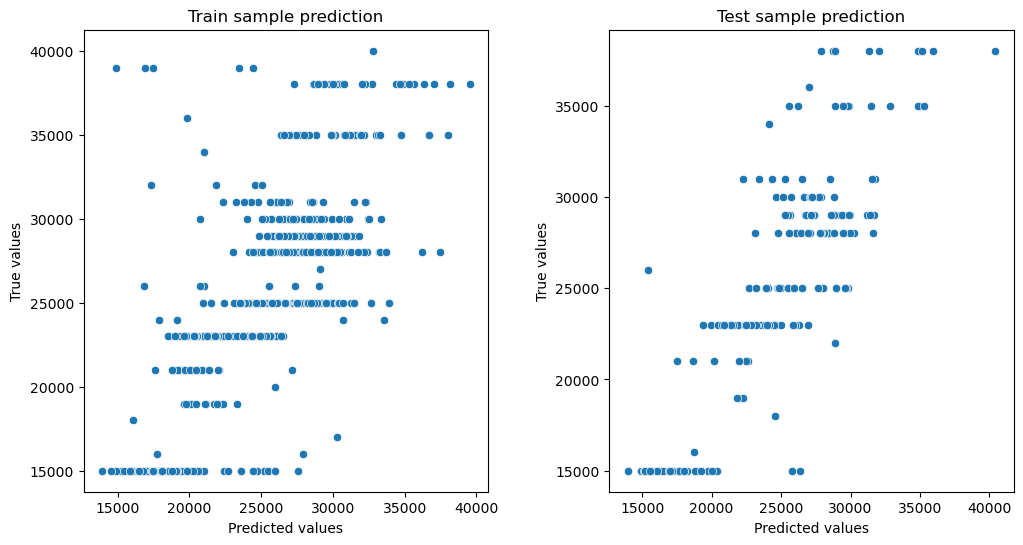

In [136]:
lr_y_train_preds = lr.predict(X_train)
lr_y_test_preds = lr.predict(X_test)
evaluate_preds(y_train, lr_y_train_preds, y_test, lr_y_test_preds)

The predictions of Linear Regression are all over the place, both in terms of overshooting and undershooting the values, hopefully the other models are better fits for the data as these predictions are in no way satisfactory

### Gradient Boosting Regressor Model

In [137]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Train R2:	0.886
Test R2:	0.874


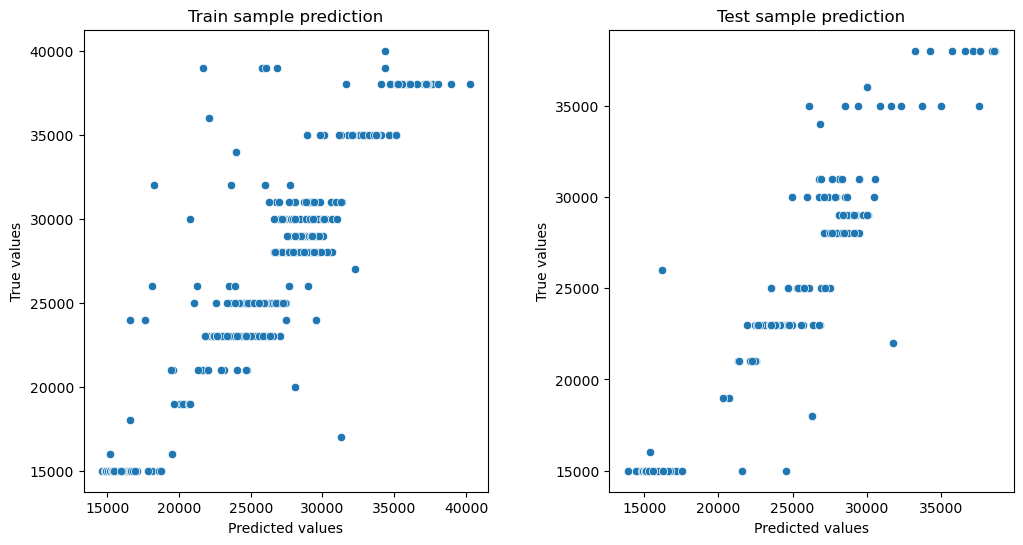

In [138]:
gb_y_train_preds = gb.predict(X_train)
gb_y_test_preds = gb.predict(X_test)
evaluate_preds(y_train, gb_y_train_preds, y_test, gb_y_test_preds)

Gradient Boosting Regressor shows much better results than Linear Regression, with the main issue being that it predicts the prices to be lower than what they really are, though it is a prime candidate for future tuning

### Random Forest Regressor Model

In [131]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Train R2:	0.966
Test R2:	0.891


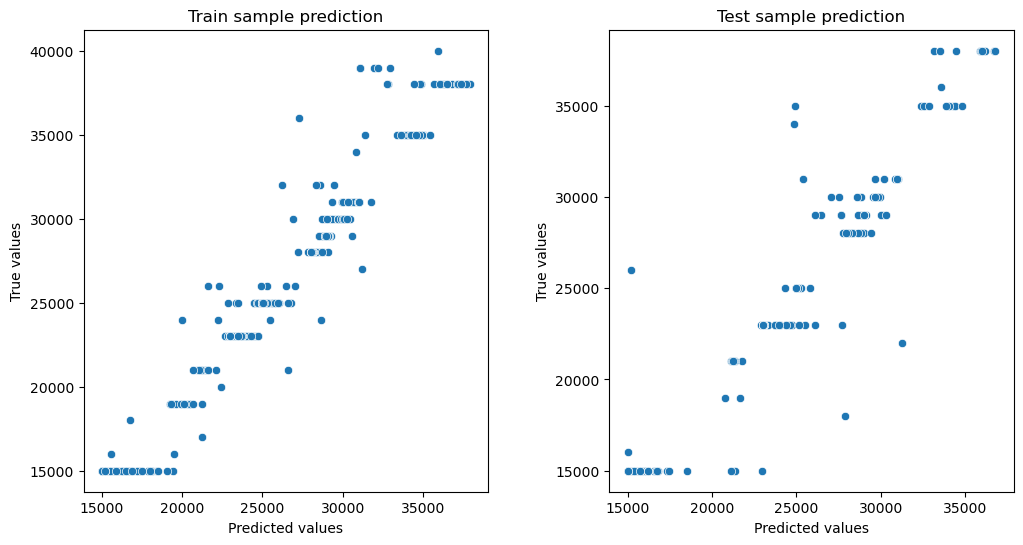

In [132]:
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Even better results than Gradient Boosting Regressor! 

Random Forest Regressor shows the best results out of the 3 models and I will be moving forward with it to fine-tune the hyperparameters, additionally, errors in its predictions contain a roughly equal amount of overshooting and undershooting, meaning the model is less skewed in its predictions overall

In [111]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), 
                                   columns=['Feature names', 'Importance'])

feature_importances.sort_values(by='Importance', ascending=False)

,Feature names,Importance
0,Age,0.631139
3,AnyTransplants,0.099931
6,Weight,0.081338
7,BMI,0.045550
4,AnyChronicDiseases,0.036690
10,NumberOfMajorSurgeries,0.035287
5,Height,0.029432
9,HistoryOfCancerInFamily,0.024570
2,BloodPressureProblems,0.006915
1,Diabetes,0.006146


## Hyperparameter Tuning

In [115]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


The parameters above will be considered as our baseline, with an R2 score of 0.895

In [124]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [118]:
rf_tuning = RandomForestRegressor()

rf_rscv = RandomizedSearchCV(estimator = rf_tuning, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_rscv.fit(X_train, y_train)

rf_rscv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

Train R2:	0.879
Test R2:	0.905


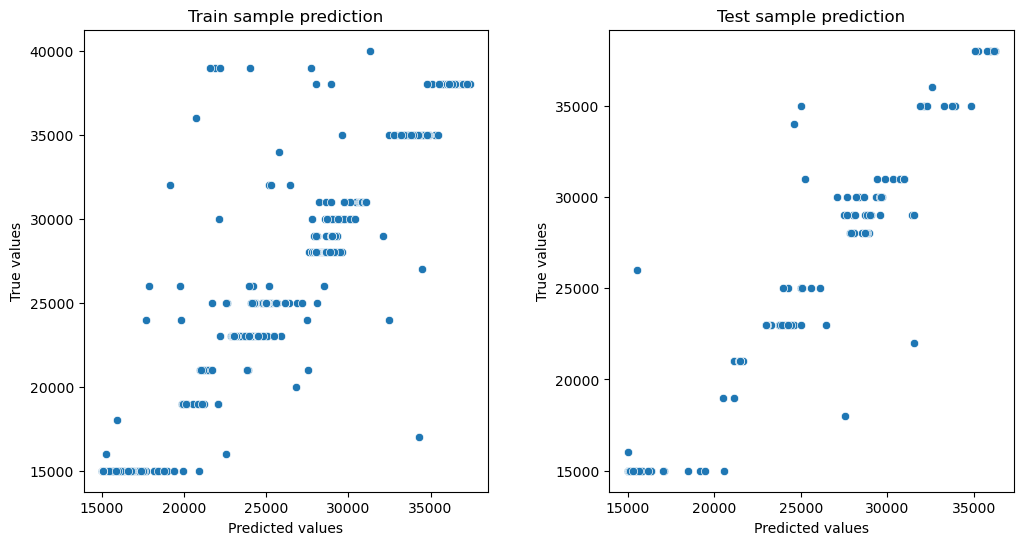

In [130]:
rf_tuned = RandomForestRegressor(n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features='auto',
                            max_depth=100, bootstrap=True, random_state=42)

rf_tuned.fit(X_train, y_train)

y_train_preds = rf_tuned.predict(X_train)
y_test_preds = rf_tuned.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

The tuning resulted in a lower R2 score for the train set, however also resulting in a marginal increase in the test R2 score, as such, I will take the given best features and perform a Grid Search Cross Validation based on them to, hopefully, increase the R2 even more

In [139]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [95, 98, 100, 103, 105],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [10, 12, 14, 16, 18, 20],
    'n_estimators': [550, 600, 650, 700]}

# Create a based model
rf_gs = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=16, n_estimators=600; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=16, n_estimators=650; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=16, n_estimators=700; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=700; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=550; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estim

{'bootstrap': True,
 'max_depth': 98,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 550}

Train R2:	0.879
Test R2:	0.906


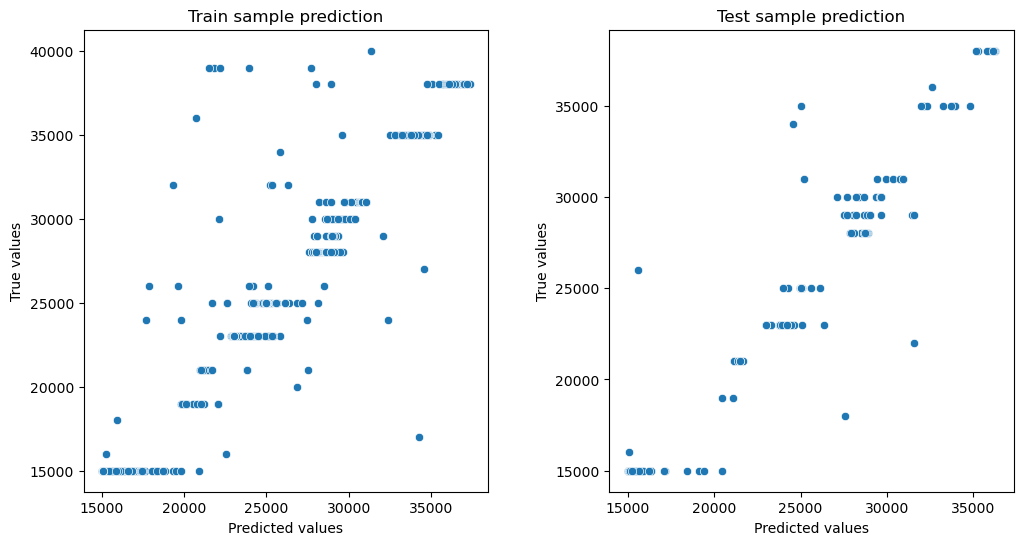

[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=12, n_estimators=650; total time=   1.6s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=550; total time=   1.4s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=550; total time=   1.4s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=650; total time=   1.6s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=700; total time=   1.7s
[CV] END bootstrap=True, max_depth=103, max_features=auto, min_samples_leaf=4, min_samples_split=16, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth

In [140]:
rf_final = RandomForestRegressor(n_estimators=550, min_samples_split=10, min_samples_leaf=2, max_features='auto',
                            max_depth=98, bootstrap=True, random_state=42)

rf_final.fit(X_train, y_train)

y_train_preds = rf_final.predict(X_train)
y_test_preds = rf_final.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

After performing the Grid Search cross validation the results marginally improved again, though it would seem that we have reached diminishing returns in terms of hyperparameter tuning, so this is the final model

In total, hyperparameter tuning resulted in an increase of 0.015 in terms of R2 score on the test set, so it can be considered a relative success, expecially considering that the R2 score was high to begin with